# Stock Price Perdiction Model

In [20]:
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt


In [21]:
### show pakages vision 
print("Yahoo Fianance lib : ", yf.__version__)
print("Panadas : ", pd.__version__)

Yahoo Fianance lib :  0.1.63
Panadas :  1.3.5


### Data Processing and Cleaning 

In [22]:
stock_symbol = "GOOGL"
start_date = "2022-01-01"
end_date = "2023-01-01"
# Download historical stock data
data = yf.download(stock_symbol, start="2022-01-01", end="2023-01-01")
data


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,145.054993,145.850998,143.712997,144.991501,144.991501,28646000
2022-01-04,145.395996,146.485001,143.716507,144.399506,144.399506,28400000
2022-01-05,144.419998,144.499496,137.688004,137.774994,137.774994,54618000
2022-01-06,136.998505,139.940002,136.558502,137.747498,137.747498,37348000
2022-01-07,138.145493,138.448502,135.766495,137.016998,137.016998,29760000
...,...,...,...,...,...,...
2022-12-23,87.110001,89.550003,87.070000,89.230003,89.230003,23003000
2022-12-27,88.800003,88.940002,87.010002,87.389999,87.389999,20097300
2022-12-28,86.980003,88.040001,85.940002,86.019997,86.019997,19523200


In [23]:
print(data.isnull().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [24]:
# Calculate daily returns using the closing prices
data["Daily_Return"] = data["Close"].pct_change()
data

,Open,High,Low,Close,Adj Close,Volume,Daily_Return
Date,,,,,,,
2022-01-03,145.054993,145.850998,143.712997,144.991501,144.991501,28646000,NaN
2022-01-04,145.395996,146.485001,143.716507,144.399506,144.399506,28400000,-0.004083
2022-01-05,144.419998,144.499496,137.688004,137.774994,137.774994,54618000,-0.045876
2022-01-06,136.998505,139.940002,136.558502,137.747498,137.747498,37348000,-0.000200
2022-01-07,138.145493,138.448502,135.766495,137.016998,137.016998,29760000,-0.005303
...,...,...,...,...,...,...,...
2022-12-23,87.110001,89.550003,87.070000,89.230003,89.230003,23003000,0.016750
2022-12-27,88.800003,88.940002,87.010002,87.389999,87.389999,20097300,-0.020621
2022-12-28,86.980003,88.040001,85.940002,86.019997,86.019997,19523200,-0.015677


In [25]:
# Calculate moving averages as additional features
data["MA_10"] = data["Close"].rolling(window=10).mean()
data["MA_50"] = data["Close"].rolling(window=50).mean()
data[10:70]


,Open,High,Low,Close,Adj Close,Volume,Daily_Return,MA_10,MA_50
Date,,,,,,,,,
2022-01-18,136.175003,137.131500,135.438507,135.998001,135.998001,34872000,-0.024968,139.084048,NaN
2022-01-19,136.523499,137.959503,135.015503,135.116501,135.116501,28648000,-0.006482,138.155748,NaN
2022-01-20,136.250000,137.626007,132.964493,133.307495,133.307495,29908000,-0.013388,137.708998,NaN
2022-01-21,132.593506,134.865494,130.086502,130.351501,130.351501,55652000,-0.022174,136.969398,NaN
2022-01-24,125.977997,131.203003,124.500000,130.804001,130.804001,76622000,0.003471,136.348099,NaN
2022-01-25,128.740005,129.399002,126.500504,126.934998,126.934998,46960000,-0.029579,135.174649,NaN
2022-01-26,131.119003,133.000000,127.141998,129.233002,129.233002,49130000,0.018104,134.124350,NaN
2022-01-27,131.304001,132.652496,128.932495,129.005005,129.005005,31950000,-0.001764,132.881801,NaN
2022-01-28,129.658997,133.356506,128.485001,133.350998,133.350998,34362000,0.033689,132.358200,NaN


In [26]:

def calculate_rsi(data, window=14):
    delta = data.diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    
    return rsi

In [27]:
# Calculate the relative strength index (RSI) as another feature

data["RSI"] = calculate_rsi(data["Close"], window=14)

# Create a target variable indicating whether the next day's price will increase or decrease
data["Next_Day_Price_Up"] = (data["Close"].shift(-1) > data["Close"]).astype(int)

# Display the cleaned and preprocessed data

data

,Open,High,Low,Close,Adj Close,Volume,Daily_Return,MA_10,MA_50,RSI,Next_Day_Price_Up
Date,,,,,,,,,,,
2022-01-03,145.054993,145.850998,143.712997,144.991501,144.991501,28646000,NaN,NaN,NaN,NaN,0
2022-01-04,145.395996,146.485001,143.716507,144.399506,144.399506,28400000,-0.004083,NaN,NaN,0.000000,0
2022-01-05,144.419998,144.499496,137.688004,137.774994,137.774994,54618000,-0.045876,NaN,NaN,0.000000,0
2022-01-06,136.998505,139.940002,136.558502,137.747498,137.747498,37348000,-0.000200,NaN,NaN,0.000000,0
2022-01-07,138.145493,138.448502,135.766495,137.016998,137.016998,29760000,-0.005303,NaN,NaN,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,87.110001,89.550003,87.070000,89.230003,89.230003,23003000,0.016750,90.916000,94.872000,25.676308,0
2022-12-27,88.800003,88.940002,87.010002,87.389999,87.389999,20097300,-0.020621,90.324001,94.688600,26.506600,0
2022-12-28,86.980003,88.040001,85.940002,86.019997,86.019997,19523200,-0.015677,89.363000,94.409600,27.406265,1


In [28]:
### Some of feature are calculate from pervious consists NA, so drop those rows before spliting
data.dropna(subset=["MA_10", "MA_50"], inplace=True)
data

,Open,High,Low,Close,Adj Close,Volume,Daily_Return,MA_10,MA_50,RSI,Next_Day_Price_Up
Date,,,,,,,,,,,
2022-03-15,126.975998,129.854507,125.720497,129.197998,129.197998,30920000,0.025780,130.472950,135.111500,52.304938,1
2022-03-16,130.733002,133.332993,128.734497,133.280502,133.280502,35576000,0.031599,130.343850,134.877280,50.869364,1
2022-03-17,133.149002,134.080505,132.184998,133.839005,133.839005,28264000,0.004190,130.337800,134.666070,49.051067,1
2022-03-18,133.424500,136.244003,132.258499,136.125504,136.125504,44566000,0.017084,130.759701,134.633080,51.553791,0
2022-03-21,136.163498,137.050003,134.092499,136.101501,136.101501,26832000,-0.000176,131.732001,134.600160,53.052807,1
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,87.110001,89.550003,87.070000,89.230003,89.230003,23003000,0.016750,90.916000,94.872000,25.676308,0
2022-12-27,88.800003,88.940002,87.010002,87.389999,87.389999,20097300,-0.020621,90.324001,94.688600,26.506600,0
2022-12-28,86.980003,88.040001,85.940002,86.019997,86.019997,19523200,-0.015677,89.363000,94.409600,27.406265,1


In [29]:
# # Calculate the 10-day average trading volume
# data["Average_Volume_10"] = data["Volume"].rolling(window=10).mean()

# # Drop rows with NaN values after calculating the new feature
# data.dropna(subset=["Average_Volume_10"], inplace=True)
# data

In [30]:

## Split  dataset into training and testing sets

# Define the features (X) and the target variable (y)
X = data.drop(columns=["Next_Day_Price_Up"])  # Features excluding the target
y = data["Next_Day_Price_Up"]  # Target variable

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Random forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics for Random Forest model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred)
rf_roc_auc = roc_auc_score(y_test, rf_y_pred)

# Print the evaluation metrics for Random Forest model
print("Random Forest Model Evaluation:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)
print("ROC-AUC Score:", rf_roc_auc)

Random Forest Model Evaluation:
Accuracy: 0.4634146341463415
Precision: 0.3888888888888889
Recall: 0.3888888888888889
F1 Score: 0.3888888888888889
ROC-AUC Score: 0.4553140096618358


### Decision tree classfier

In [32]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)

Accuracy: 0.5609756097560976
Precision: 0.5
Recall: 0.5555555555555556
F1 Score: 0.5263157894736842
ROC-AUC Score: 0.5603864734299517


### Random search cross validation on Decision Tree Classifier

In [33]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define hyperparameter distributions to sample from
param_dist = {
    'max_depth': [None] + list(np.arange(10, 31, 1)),
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8]
}

# Create a RandomizedSearchCV object with the Decision Tree classifier and parameter distributions
random_search = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=50,  # Number of random samples to try
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # You can choose another scoring metric if needed
    random_state=42,
    n_jobs=-1  # Use all available CPU cores for parallel processing
)

# Perform the randomized hyperparameter search on the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters found by the randomized search
print("Best Hyperparameters for Decision Tree (Randomized Search):")
print(random_search.best_params_)

# Get the best Decision Tree model from the randomized search
best_dt_model_random = random_search.best_estimator_

# Evaluate the best Decision Tree model on the test set
best_dt_y_pred_random = best_dt_model_random.predict(X_test)

# Calculate evaluation metrics for the best model
best_dt_accuracy_random = accuracy_score(y_test, best_dt_y_pred_random)
best_dt_precision_random = precision_score(y_test, best_dt_y_pred_random)
best_dt_recall_random = recall_score(y_test, best_dt_y_pred_random)
best_dt_f1_random = f1_score(y_test, best_dt_y_pred_random)
best_dt_roc_auc_random = roc_auc_score(y_test, best_dt_y_pred_random)

# Print the evaluation metrics for the best Decision Tree model
print("\nBest Decision Tree Model Evaluation (Randomized Search):")
print("Accuracy:", best_dt_accuracy_random)
print("Precision:", best_dt_precision_random)
print("Recall:", best_dt_recall_random)
print("F1 Score:", best_dt_f1_random)
print("ROC-AUC Score:", best_dt_roc_auc_random)


Best Hyperparameters for Decision Tree (Randomized Search):
{'min_samples_split': 20, 'min_samples_leaf': 4, 'max_depth': 18}

Best Decision Tree Model Evaluation (Randomized Search):
Accuracy: 0.5365853658536586
Precision: 0.47619047619047616
Recall: 0.5555555555555556
F1 Score: 0.5128205128205129
ROC-AUC Score: 0.538647342995169


### Grid Search Cross Validation on Random forest Classifier

In [34]:
from sklearn.model_selection import GridSearchCV

# Define a range of hyperparameter values to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object with the Random Forest classifier and parameter grid
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # You can choose another scoring metric if needed
    n_jobs=-1  # Use all available CPU cores for parallel processing
)

# Perform the hyperparameter search on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the grid search
print("Best Hyperparameters:")
print(grid_search.best_params_)

# Get the best model from the grid search
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the test set
best_rf_y_pred = best_rf_model.predict(X_test)

# Calculate evaluation metrics for the best model
best_rf_accuracy = accuracy_score(y_test, best_rf_y_pred)
best_rf_precision = precision_score(y_test, best_rf_y_pred)
best_rf_recall = recall_score(y_test, best_rf_y_pred)
best_rf_f1 = f1_score(y_test, best_rf_y_pred)
best_rf_roc_auc = roc_auc_score(y_test, best_rf_y_pred)

# Print the evaluation metrics for the best model
print("\nBest Random Forest Model Evaluation:")
print("Accuracy:", best_rf_accuracy)
print("Precision:", best_rf_precision)
print("Recall:", best_rf_recall)
print("F1 Score:", best_rf_f1)
print("ROC-AUC Score:", best_rf_roc_auc)


Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 100}

Best Random Forest Model Evaluation:
Accuracy: 0.4634146341463415
Precision: 0.3888888888888889
Recall: 0.3888888888888889
F1 Score: 0.3888888888888889
ROC-AUC Score: 0.4553140096618358


### Simulation 

#### Similation on Random search cross validation on Decision Tree Classifier

In [40]:


# Initialize variables for simulation
initial_cash = 10000  
cash = initial_cash  # Current cash balance
shares_held = 0  
portfolio_value = []  # Track portfolio value over time

# Define a trading strategy based on model's predictions
for index, row in data.iterrows():

    prediction = random_search.predict([row.drop(["Next_Day_Price_Up"])]) 

    # Buy if the model predicts an increase 
    if prediction > 0.5:
        # Calculate the number of shares to buy 
        shares_to_buy = int(cash / row['Close'])
        
        # Buy shares
        cost = shares_to_buy * row['Close']
        cash -= cost
        shares_held += shares_to_buy

    # Sell if the model predicts a decrease 
    elif prediction < 0.5:
        # Sell all shares
        revenue = shares_held * row['Close']
        cash += revenue
        shares_held = 0

    # Calculate the portfolio value at each time step
    portfolio_value.append(cash + shares_held * row['Close'])

# Calculate the final portfolio value
final_portfolio_value = cash + shares_held * data.iloc[-1]['Close']

# Calculate the total return on investment
total_return = (final_portfolio_value - initial_cash) / initial_cash

# Print the final portfolio value and total return
print("Final Portfolio Value: $", final_portfolio_value)
print("Total Return on Investment: {:.2f}%".format(total_return * 100))


Final Portfolio Value: $ 19038.02604675293
Total Return on Investment: 90.38%


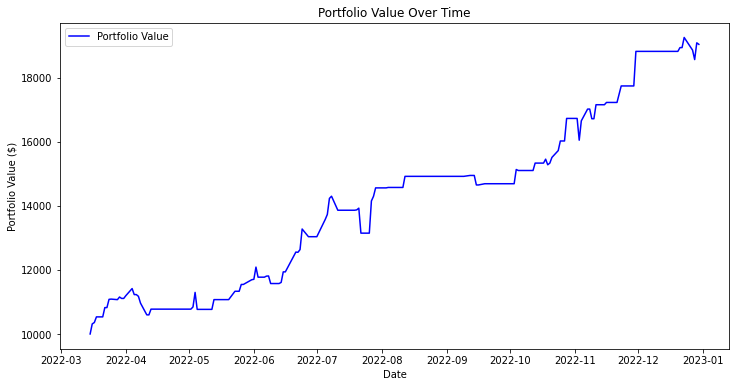

In [41]:
# Plot portfolio value over time
plt.figure(figsize=(12, 6))
plt.plot(data.index, portfolio_value, label="Portfolio Value", color="blue")
plt.legend()
plt.title("Portfolio Value Over Time")
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($)")
plt.show()

#### Simulation on Grid Search Cross Validation on Random forest Classifier

In [42]:


# Initialize variables for simulation
initial_cash = 10000  
cash = initial_cash  # Current cash balance
shares_held = 0  
portfolio_value = []  # Track portfolio value over time

# Define a trading strategy based on model's predictions
for index, row in data.iterrows():

    prediction = grid_search.predict([row.drop(["Next_Day_Price_Up"])]) 

    # Buy if the model predicts an increase 
    if prediction > 0.5:
        # Calculate the number of shares to buy 
        shares_to_buy = int(cash / row['Close'])
        
        # Buy shares
        cost = shares_to_buy * row['Close']
        cash -= cost
        shares_held += shares_to_buy

    # Sell if the model predicts a decrease 
    elif prediction < 0.5:
        # Sell all shares
        revenue = shares_held * row['Close']
        cash += revenue
        shares_held = 0

    # Calculate the portfolio value at each time step
    portfolio_value.append(cash + shares_held * row['Close'])

# Calculate the final portfolio value
final_portfolio_value = cash + shares_held * data.iloc[-1]['Close']

# Calculate the total return on investment
total_return = (final_portfolio_value - initial_cash) / initial_cash

# Print the final portfolio value and total return
print("Final Portfolio Value: $", final_portfolio_value)
print("Total Return on Investment: {:.2f}%".format(total_return * 100))


Final Portfolio Value: $ 37715.989501953125
Total Return on Investment: 277.16%


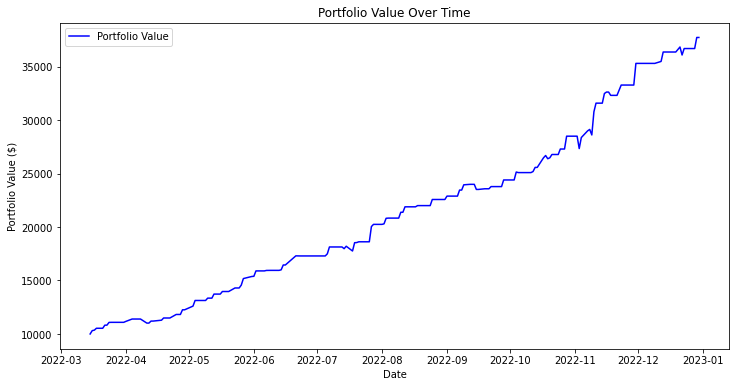

In [43]:

# Plot portfolio value over time
plt.figure(figsize=(12, 6))
plt.plot(data.index, portfolio_value, label="Portfolio Value", color="blue")
plt.legend()
plt.title("Portfolio Value Over Time")
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($)")
plt.show()